In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [157]:
df=pd.read_csv("Train.csv")
file=df

In [158]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [159]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [160]:
file.describe(include=['float','int'])


Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [161]:
file.groupby('Outlet_Type').describe()

Item_Weight                                             \
                        count       mean       std    min      25%   50%   
Outlet_Type                                                                
Grocery Store           555.0  12.913153  4.638683  4.610  8.89500  12.6   
Supermarket Type1      5577.0  12.849509  4.637104  4.555  8.77500  12.6   
Supermarket Type2       928.0  12.873346  4.689009  4.610  8.62625  12.6   
Supermarket Type3         0.0        NaN       NaN    NaN      NaN   NaN   

                                 Item_Visibility            ...  \
                      75%    max           count      mean  ...   
Outlet_Type                                                 ...   
Grocery Store      16.750  21.35          1083.0  0.104862  ...   
Supermarket Type1  16.750  21.35          5577.0  0.060723  ...   
Supermarket Type2  17.025  21.35           928.0  0.061014  ...   
Supermarket Type3     NaN    NaN           935.0  0.058615  ...   

                  Outlet_Establishment_Year         Item_Outlet_Sales  \
                                        75%     max             count   
Outlet_Type                                                             
Grocery Store                        1998.0  1998.0            1083.0   
Supermarket Type1                    2004.0  2007.0            5577.0   
Supermarket Type2                    2009.0  2009.0             928.0   
Supermarket Type3                    1985.0  1985.0             935.0   

                                                                              \
                          mean          std       min         25%        50%   
Outlet_Type                                                                    
Grocery Store       339.828500   260.851582   33.2900   153.79980   256.9988   
Supermarket Type1  2316.181148  1515.965558   73.2380  1151.16820  1990.7420   
Supermarket Type2  1995.498739  1375.932889   69.2432   981.55565  1655.1788   
Supermarket Type3  3694.038558  2127.760054  241.6854  2044.33890  3364.9532   

                                           
                          75%         max  
Outlet_Type                                
Grocery Store       458.73620   1775.6886  
Supermarket Type1  3135.91800  10256.6490  
Supermarket Type2  2702.64865   6768.5228  
Supermarket Type3  4975.52340  13086.9648  

[4 rows x 40 columns]

In [162]:
file.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [163]:
file.fillna(file['Item_Weight'].mean(),inplace=True)
file.fillna(file['Outlet_Size'].mode(),inplace=True)

In [164]:
file.duplicated().sum()

0

In [165]:
file.shape

(8523, 12)

In [251]:
def removeout(file):
    for col in file.columns:
        if file[col].dtype=='float64' or file[col].dtype=='int':
            
            q1,q3=file[col].quantile([0.25,0.75])
            IQR=q3-q1
            lower=q1-(1.5*IQR)
            upper=q3+(1.5*IQR)
            file[file[col]<lower]=None
            file[file[col]>upper]=None
    file.dropna(inplace=True)
    return file


In [252]:
cleaned_data=removeout(file)

<Axes: ylabel='Item_Weight'>

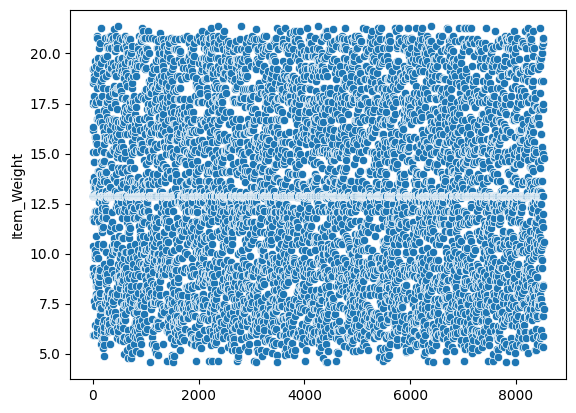

In [254]:
sns.scatterplot(y=cleaned_data['Item_Weight'],x=cleaned_data.index)

<Axes: ylabel='Item_Weight'>

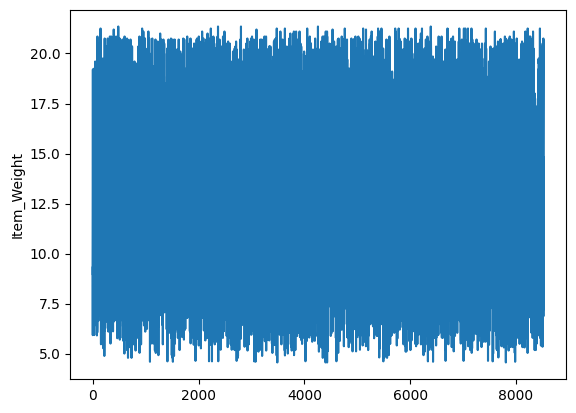

In [255]:
sns.lineplot(y=cleaned_data['Item_Weight'],x=cleaned_data.index)

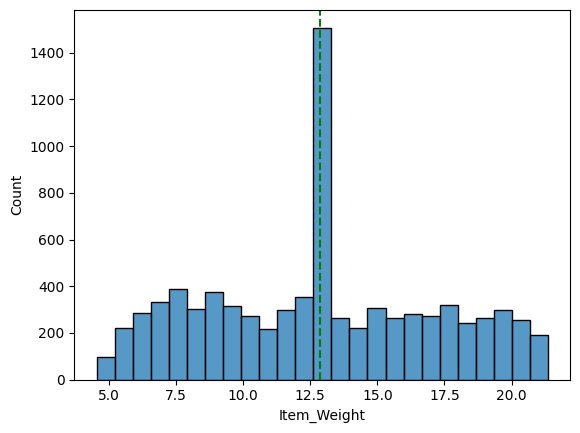

In [256]:
sns.histplot(x=cleaned_data['Item_Weight'])
plt.axvline(x=cleaned_data['Item_Weight'].mean(),color='g', linestyle='--')

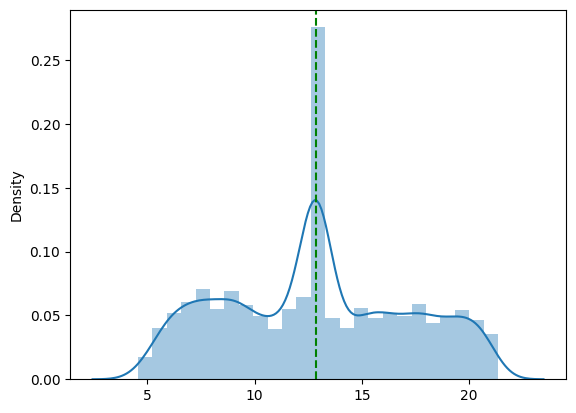

In [257]:
sns.distplot(x=cleaned_data['Item_Weight'])
plt.axvline(x=cleaned_data['Item_Weight'].mean(),color='g', linestyle='--')

<Axes: xlabel='Item_Weight'>

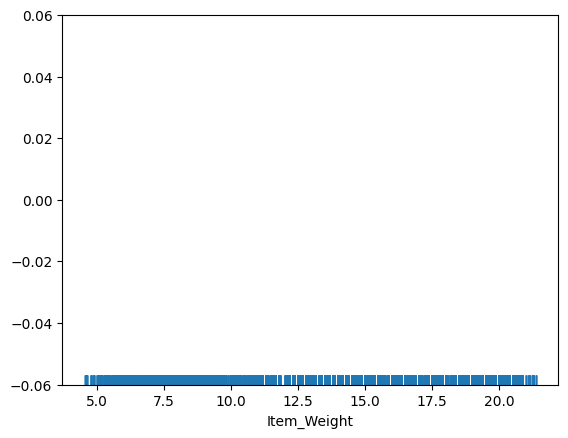

In [258]:
sns.rugplot(x=cleaned_data['Item_Weight'])

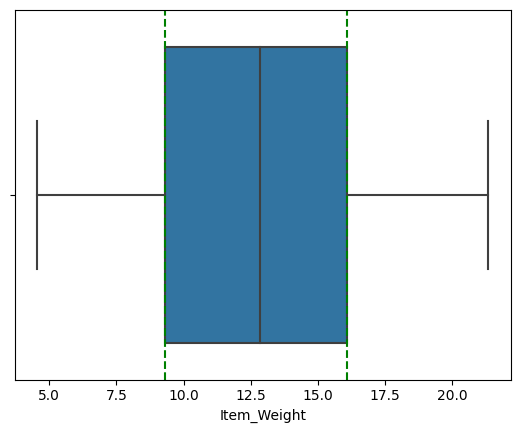

In [259]:
sns.boxplot(x=cleaned_data['Item_Weight'])
plt.axvline(x=cleaned_data['Item_Weight'].quantile(0.25),color='g', linestyle='--')
plt.axvline(x=cleaned_data['Item_Weight'].quantile(0.75),color='g', linestyle='--')

<Axes: xlabel='Item_Weight'>

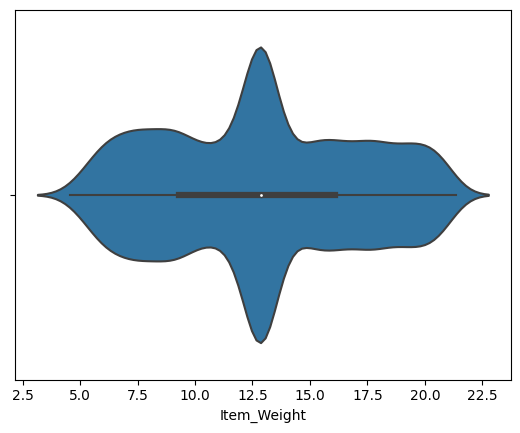

In [260]:
sns.violinplot(x=cleaned_data['Item_Weight'])

<Axes: xlabel='Item_Fat_Content'>

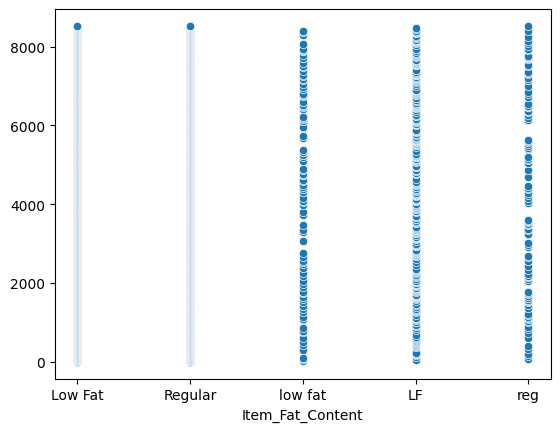

In [261]:
sns.scatterplot(x=cleaned_data['Item_Fat_Content'],y=cleaned_data.index)

Text(0, 0.5, 'Index')

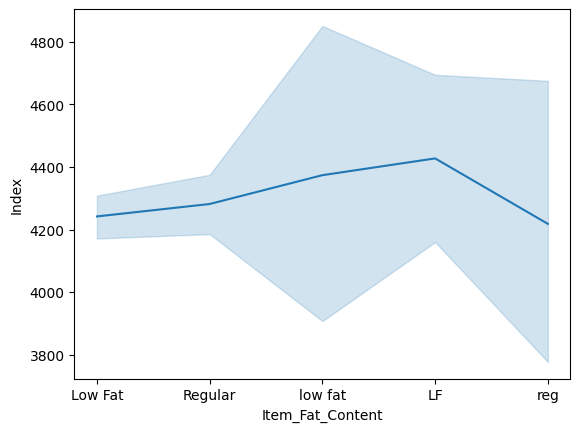

In [262]:
sns.lineplot(x=cleaned_data['Item_Fat_Content'],y=cleaned_data.index)
plt.ylabel("Index")

<Axes: xlabel='Item_Fat_Content'>

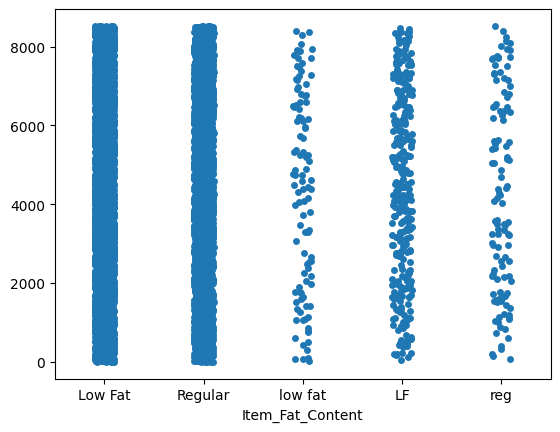

In [263]:
sns.stripplot(x=cleaned_data['Item_Fat_Content'],y=cleaned_data.index)

<Axes: xlabel='Item_Fat_Content', ylabel='Count'>

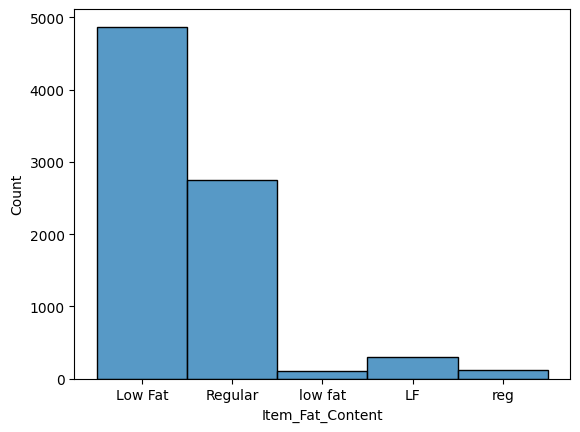

In [264]:
sns.histplot(x=cleaned_data['Item_Fat_Content'])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

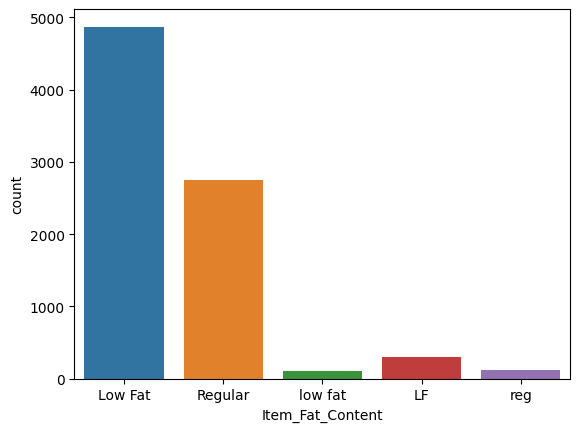

In [265]:
sns.countplot(x=cleaned_data['Item_Fat_Content'])

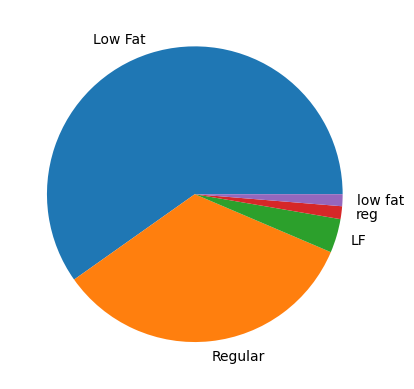

In [266]:
# help(plt.pie)
x=plt.pie(x=cleaned_data['Item_Fat_Content'].value_counts().values,labels=file['Item_Fat_Content'].value_counts().index)

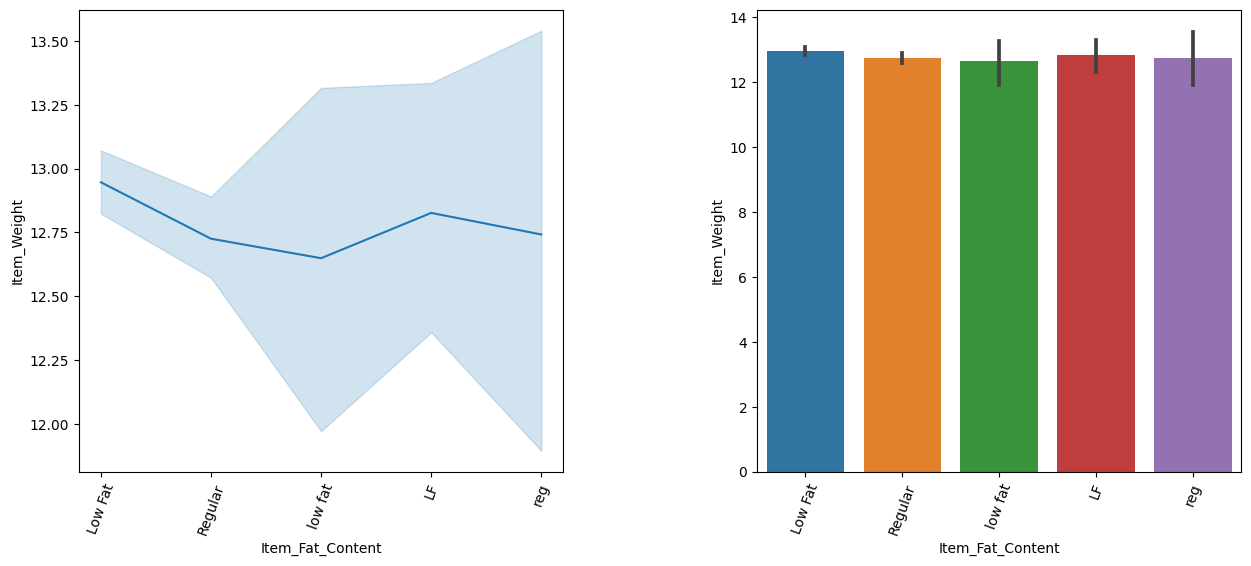

In [267]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
sns.lineplot(y=cleaned_data["Item_Weight"],x=cleaned_data["Item_Fat_Content"],ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=70)
sns.barplot(y=cleaned_data["Item_Weight"],x=cleaned_data["Item_Fat_Content"],ax=axs[1])
axs[1].tick_params('x',labelrotation=70)
# sns.swarmplot(y=cleaned_data["Item_Weight"],x=cleaned_data["Item_Fat_Content"],ax=axs[0,2])
plt.subplots_adjust(hspace=0.5,wspace=0.4)

In [268]:
df=cleaned_data

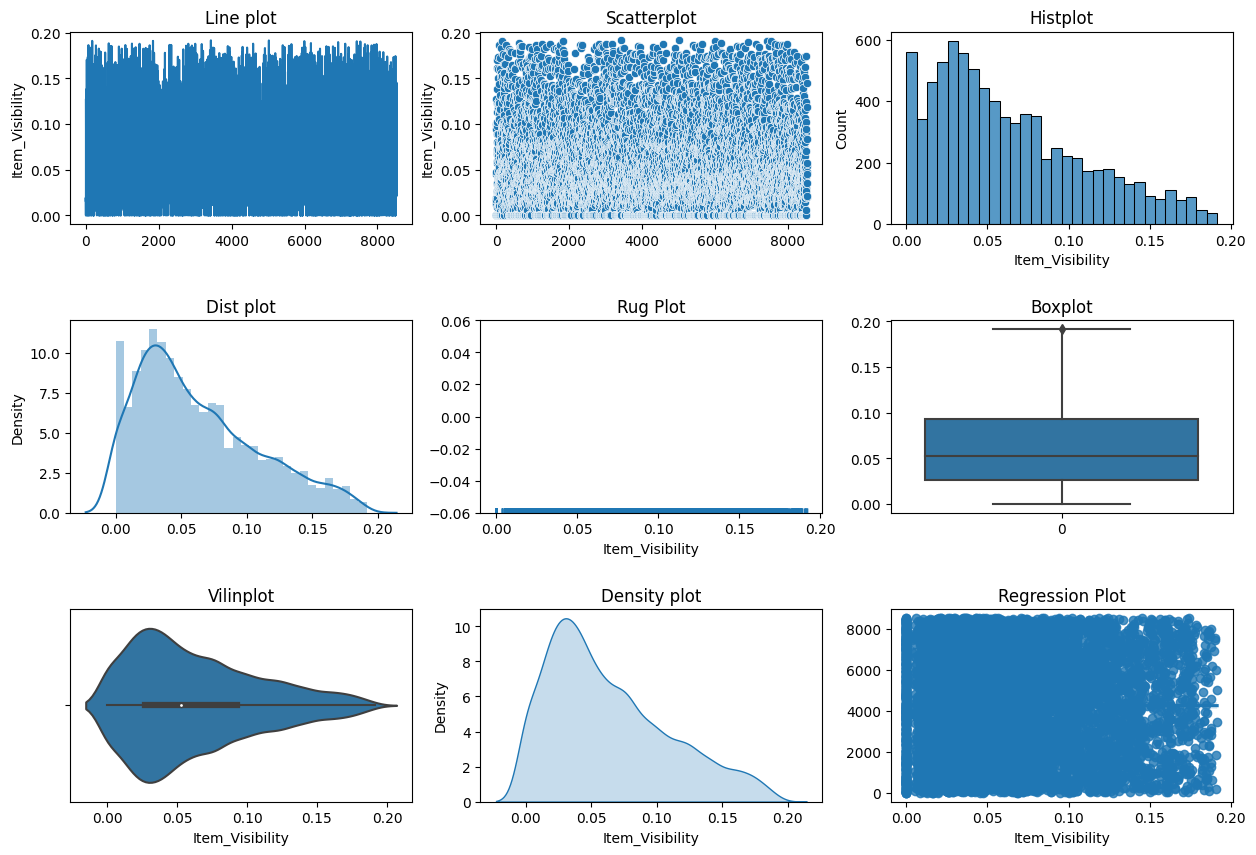

In [269]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,10))
sns.lineplot(df['Item_Visibility'],ax=axs[0,0])
axs[0, 0].set_title("Line plot")
sns.scatterplot(y=df['Item_Visibility'],x=df.index, ax=axs[0,1])
axs[0,1].set_title("Scatterplot")
sns.histplot(x=df['Item_Visibility'],ax=axs[0,2])
axs[0,2].set_title("Histplot")
sns.distplot(x=df['Item_Visibility'],ax=axs[1,0])
axs[1,0].set_title("Dist plot")
sns.rugplot(df['Item_Visibility'],ax=axs[1,1])
axs[1,1].set_title("Rug Plot")
sns.boxplot(df['Item_Visibility'],ax=axs[1,2])
axs[1,2].set_title("Boxplot")
sns.violinplot(x=df['Item_Visibility'],ax=axs[2,0])
axs[2,0].set_title("Vilinplot")
sns.kdeplot(df['Item_Visibility'],shade=True,ax=axs[2,1])
axs[2,1].set_title("Density plot")
sns.regplot(x=df['Item_Visibility'],y=df.index,ax=axs[2,2])
axs[2,2].set_title("Regression Plot")
# plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplots_adjust(hspace=0.5,wspace=0.2)

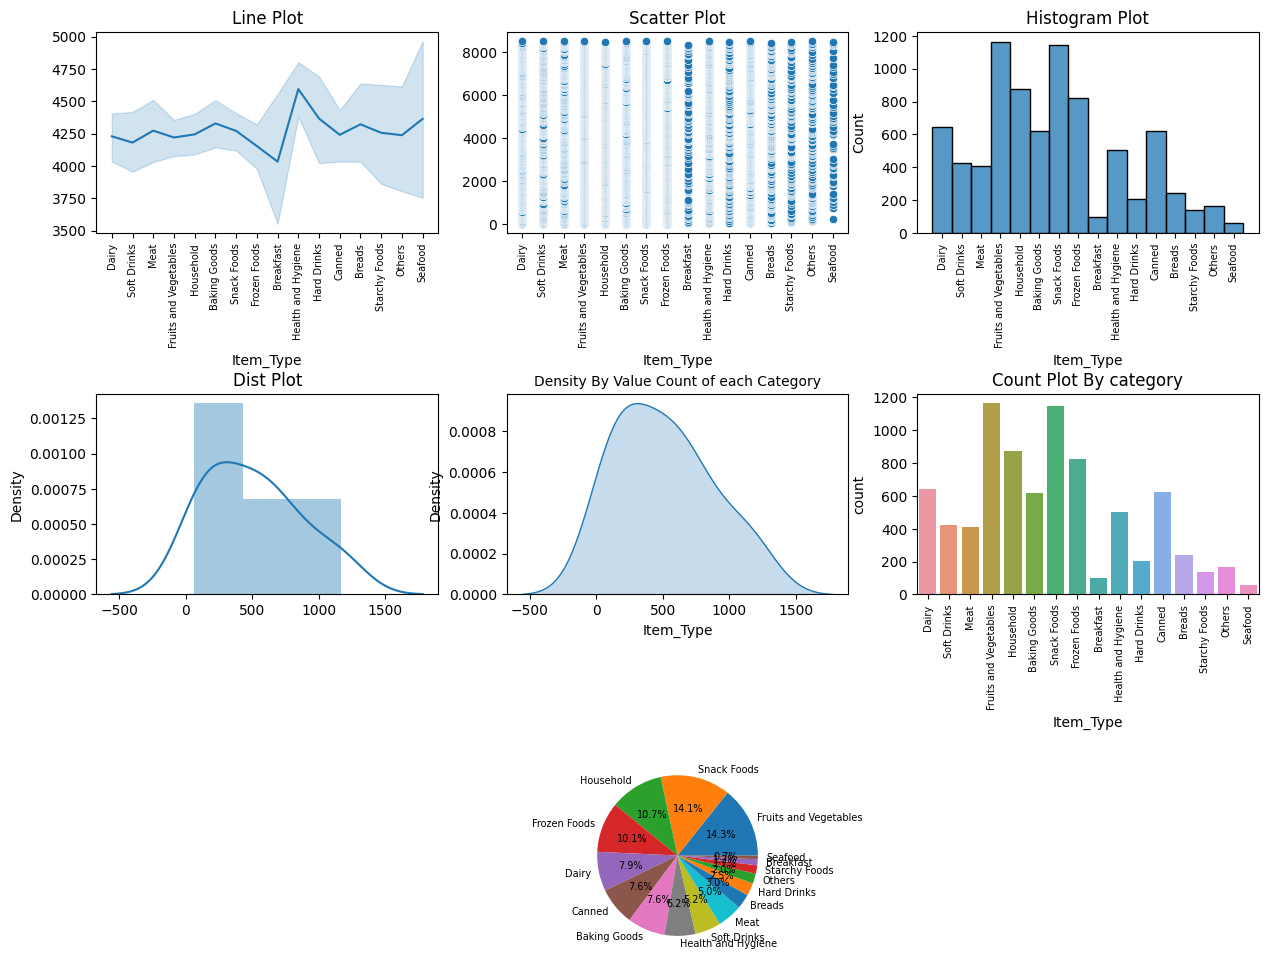

In [270]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,12))
sns.lineplot(x=df["Item_Type"],y=df.index,ax=axs[0,0])
axs[0,0].set_title("Line Plot")
# axs[0].set_xticks(np.arange(0, 10, 2))
# dum=axs[0,0].set_xticklabels(labels=df["Item_Type"],rotation=90,fontsize=7)
axs[0,0].tick_params(axis='x', labelrotation=90,labelsize=7)
sns.scatterplot(x=df["Item_Type"],y=df.index,ax=axs[0,1])
axs[0,1].set_title("Scatter Plot")
# dum=axs[0,1].set_xticklabels(labels=df["Item_Type"],rotation=90,fontsize=7)
axs[0,1].tick_params(axis='x', labelrotation=90,labelsize=7)
sns.histplot(x=df["Item_Type"],ax=axs[0,2])
axs[0,2].set_title("Histogram Plot")
axs[0,2].tick_params(axis='x', labelrotation=90,labelsize=7)
# dum=axs[0,2].set_xticklabels(labels=df["Item_Type"],rotation=90,fontsize=7)
sns.distplot(x=df["Item_Type"].value_counts(),ax=axs[1,0])
axs[1,0].set_title("Dist Plot")
sns.kdeplot(x=df["Item_Type"].value_counts(),shade=True,ax=axs[1,1])
axs[1,1].set_title("Density By Value Count of each Category",fontsize=10)
sns.countplot(x=df["Item_Type"], ax=axs[1,2])
# axs[1,2].set_xticklabels(labels=df["Item_Type"].value_counts().index,rotation=90,fontsize=7)
axs[1,2].tick_params(axis='x', labelrotation=90,labelsize=7)
axs[1,2].set_title("Count Plot By category")

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4.pie(x=df["Item_Type"].value_counts(),labels=df["Item_Type"].value_counts().index,textprops={'fontsize': 7}, autopct='%1.1f%%',)
ax4.set_position([0.1, 0.1, 1.5, 1.5])
plt.subplots_adjust(hspace=0.8)

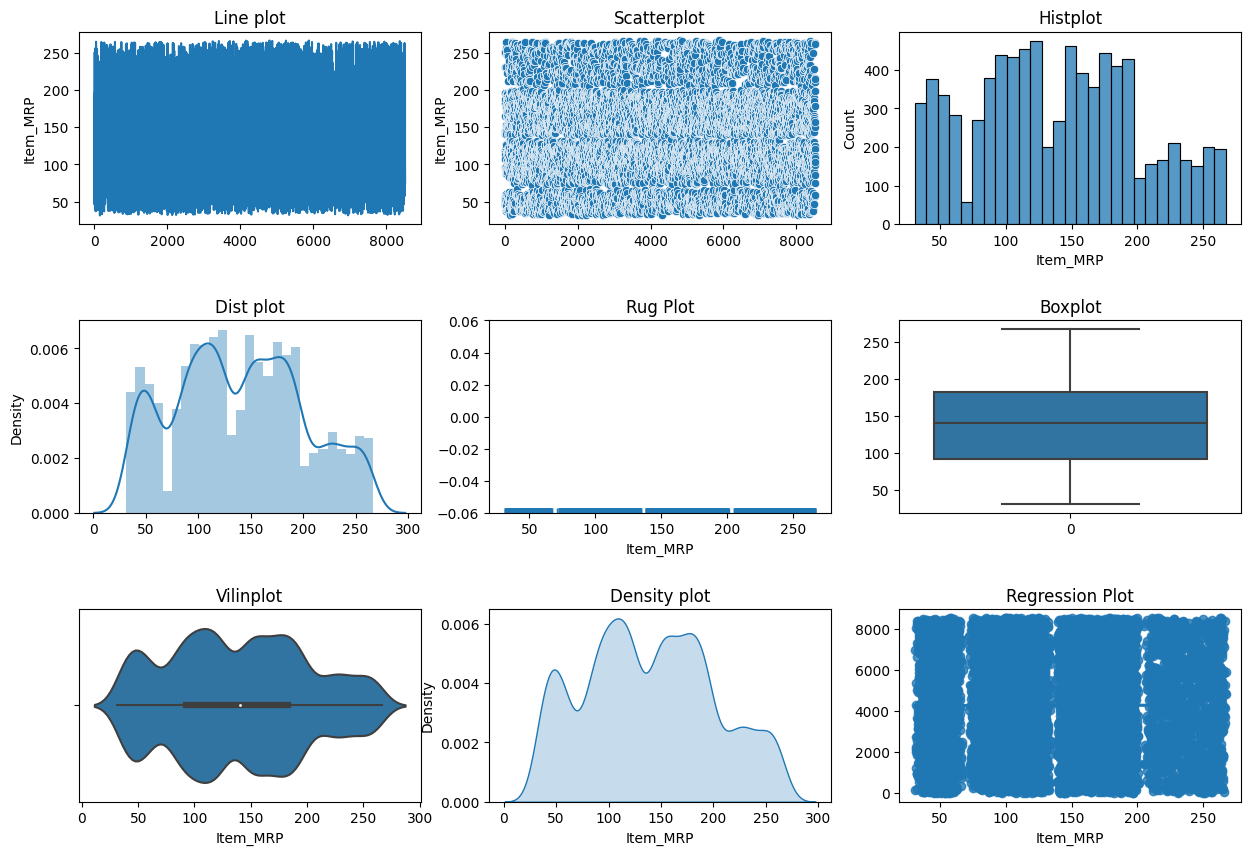

In [271]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,10))
sns.lineplot(df['Item_MRP'],ax=axs[0,0])
axs[0, 0].set_title("Line plot")
sns.scatterplot(y=df['Item_MRP'],x=df.index, ax=axs[0,1])
axs[0,1].set_title("Scatterplot")
sns.histplot(x=df['Item_MRP'],ax=axs[0,2])
axs[0,2].set_title("Histplot")
sns.distplot(x=df['Item_MRP'],ax=axs[1,0])
axs[1,0].set_title("Dist plot")
sns.rugplot(df['Item_MRP'],ax=axs[1,1])
axs[1,1].set_title("Rug Plot")
sns.boxplot(df['Item_MRP'],ax=axs[1,2])
axs[1,2].set_title("Boxplot")
sns.violinplot(x=df['Item_MRP'],ax=axs[2,0])
axs[2,0].set_title("Vilinplot")
sns.kdeplot(df['Item_MRP'],shade=True,ax=axs[2,1])
axs[2,1].set_title("Density plot")
sns.regplot(x=df['Item_MRP'],y=df.index,ax=axs[2,2])
axs[2,2].set_title("Regression Plot")
# plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplots_adjust(hspace=0.5,wspace=0.2)

In [272]:
# df.index
# df["Outlet_Size"].astype('str')

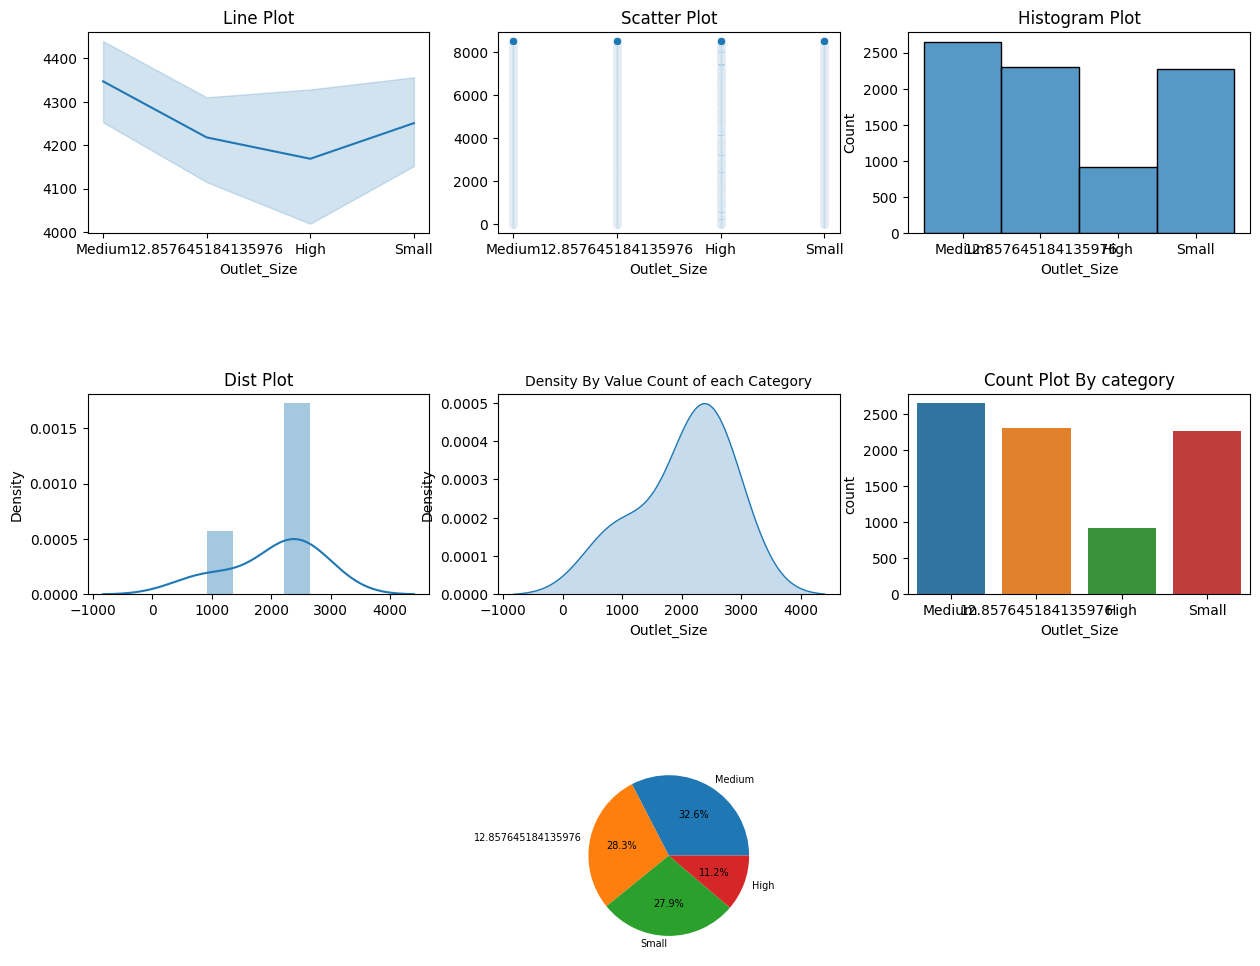

In [273]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,12))
sns.lineplot(x=df["Outlet_Size"].astype('str'),y=df.index,ax=axs[0,0])
axs[0,0].set_title("Line Plot")
# axs[0].set_xticks(np.arange(0, 10, 2))
# dum=axs[0,0].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.scatterplot(x=df["Outlet_Size"].astype('str'),y=df.index,ax=axs[0,1])
axs[0,1].set_title("Scatter Plot")
# dum=axs[0,1].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.histplot(x=df["Outlet_Size"].astype('str'),ax=axs[0,2])
axs[0,2].set_title("Histogram Plot")
# dum=axs[0,2].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.distplot(x=df["Outlet_Size"].value_counts(),ax=axs[1,0])
axs[1,0].set_title("Dist Plot")
sns.kdeplot(x=df["Outlet_Size"].value_counts(),shade=True,ax=axs[1,1])
axs[1,1].set_title("Density By Value Count of each Category",fontsize=10)
sns.countplot(x=df["Outlet_Size"].astype('str'), ax=axs[1,2])
# axs[1,2].set_xticklabels(labels=df["Outlet_Size"].value_counts().index,rotation=90,fontsize=7)
axs[1,2].set_title("Count Plot By category")

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4.pie(x=df["Outlet_Size"].value_counts(),labels=df["Outlet_Size"].value_counts().index,textprops={'fontsize': 7}, autopct='%1.1f%%',)
ax4.set_position([0.1, 0.1, 1.5, 1.5])
plt.subplots_adjust(hspace=0.8)

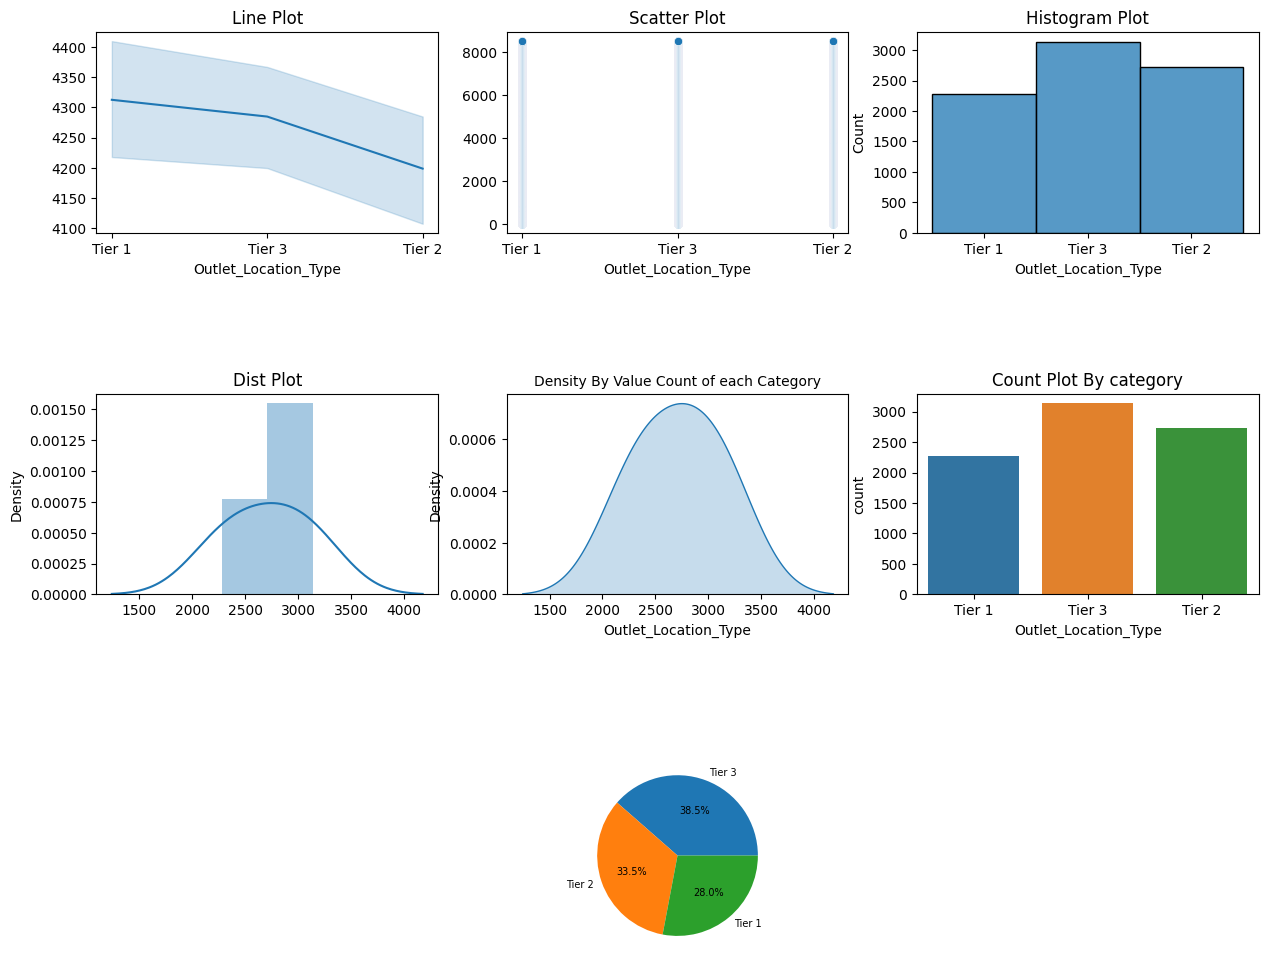

In [274]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,12))
sns.lineplot(x=df["Outlet_Location_Type"],y=df.index,ax=axs[0,0])
axs[0,0].set_title("Line Plot")
# axs[0].set_xticks(np.arange(0, 10, 2))
# dum=axs[0,0].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.scatterplot(x=df["Outlet_Location_Type"],y=df.index,ax=axs[0,1])
axs[0,1].set_title("Scatter Plot")
# dum=axs[0,1].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.histplot(x=df["Outlet_Location_Type"],ax=axs[0,2])
axs[0,2].set_title("Histogram Plot")
# dum=axs[0,2].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.distplot(x=df["Outlet_Location_Type"].value_counts(),ax=axs[1,0])
axs[1,0].set_title("Dist Plot")
sns.kdeplot(x=df["Outlet_Location_Type"].value_counts(),shade=True,ax=axs[1,1])
axs[1,1].set_title("Density By Value Count of each Category",fontsize=10)
sns.countplot(x=df["Outlet_Location_Type"], ax=axs[1,2])
# axs[1,2].set_xticklabels(labels=df["Outlet_Size"].value_counts().index,rotation=90,fontsize=7)
axs[1,2].set_title("Count Plot By category")

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4.pie(x=df["Outlet_Location_Type"].value_counts(),labels=df["Outlet_Location_Type"].value_counts().index,textprops={'fontsize': 7}, autopct='%1.1f%%',)
ax4.set_position([0.1, 0.1, 1.5, 1.5])
plt.subplots_adjust(hspace=0.8)

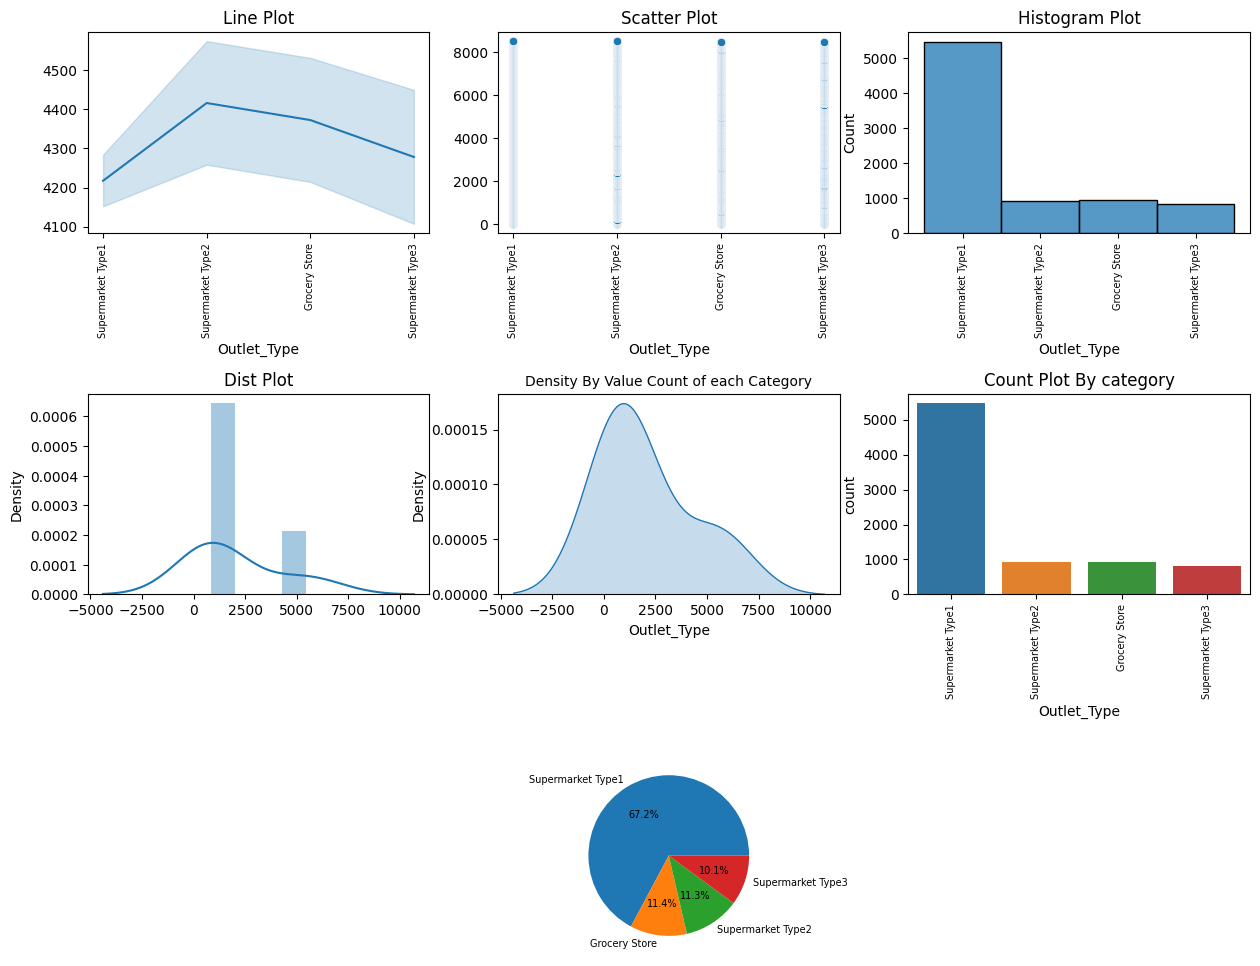

In [275]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,12))
sns.lineplot(x=df["Outlet_Type"],y=df.index,ax=axs[0,0])
axs[0,0].set_title("Line Plot")
axs[0,0].tick_params(axis='x', labelrotation=90,labelsize=7)

# axs[0].set_xticks(np.arange(0, 10, 2))
# dum=axs[0,0].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.scatterplot(x=df["Outlet_Type"],y=df.index,ax=axs[0,1])
axs[0,1].set_title("Scatter Plot")
axs[0,1].tick_params(axis='x', labelrotation=90,labelsize=7)

# dum=axs[0,1].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.histplot(x=df["Outlet_Type"],ax=axs[0,2])
axs[0,2].set_title("Histogram Plot")
axs[0,2].tick_params(axis='x', labelrotation=90,labelsize=7)

# dum=axs[0,2].set_xticklabels(labels=df["Outlet_Size"].dropna().unique(),rotation=90,fontsize=7)
sns.distplot(x=df["Outlet_Type"].value_counts(),ax=axs[1,0])
axs[1,0].set_title("Dist Plot")
sns.kdeplot(x=df["Outlet_Type"].value_counts(),shade=True,ax=axs[1,1])
axs[1,1].set_title("Density By Value Count of each Category",fontsize=10)
sns.countplot(x=df["Outlet_Type"], ax=axs[1,2])
axs[1,2].tick_params(axis='x', labelrotation=90,labelsize=7)

# axs[1,2].set_xticklabels(labels=df["Outlet_Size"].value_counts().index,rotation=90,fontsize=7)
axs[1,2].set_title("Count Plot By category")

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4.pie(x=df["Outlet_Type"].value_counts(),labels=df["Outlet_Type"].value_counts().index,textprops={'fontsize': 7}, autopct='%1.1f%%',)
ax4.set_position([0.1, 0.1, 1.5, 1.5])
plt.subplots_adjust(hspace=0.8)

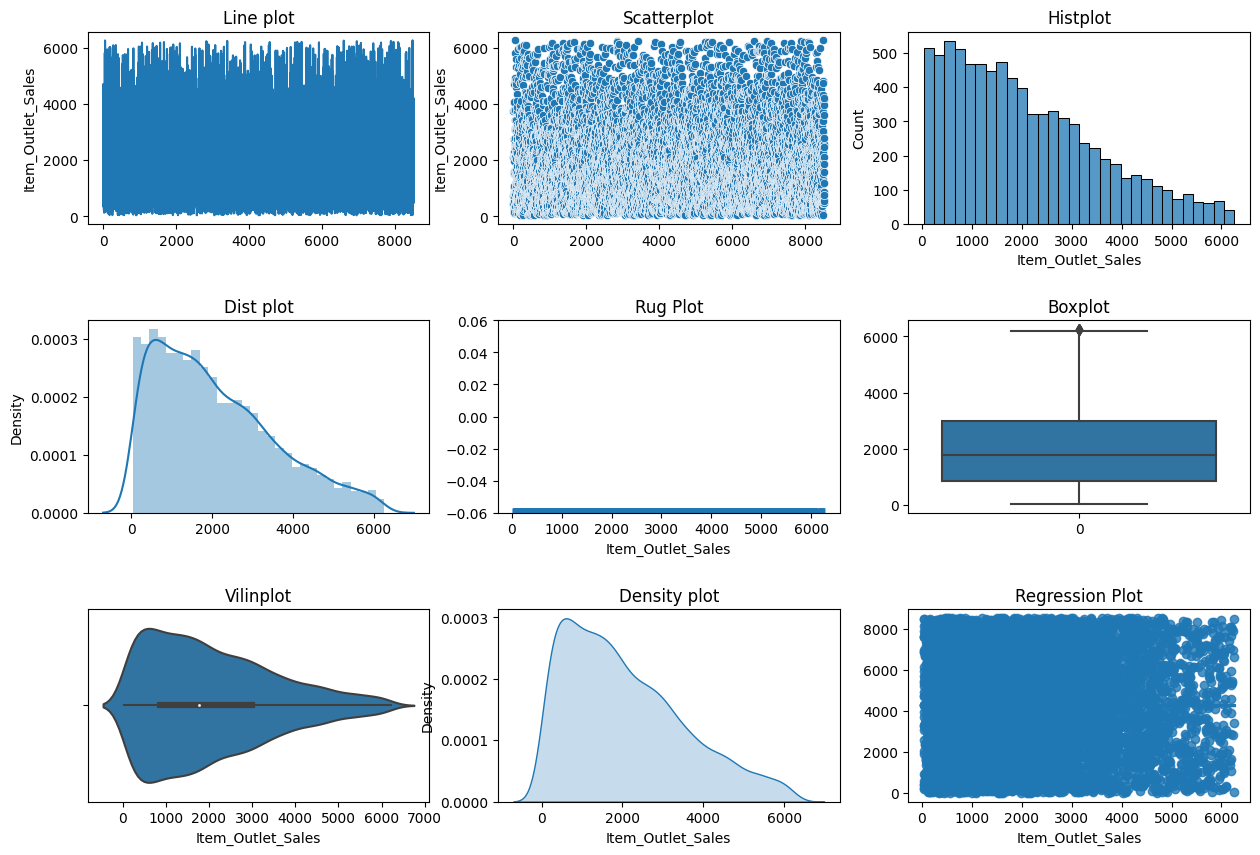

In [276]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(15,10))
sns.lineplot(df['Item_Outlet_Sales'],ax=axs[0,0])
axs[0, 0].set_title("Line plot")
sns.scatterplot(y=df['Item_Outlet_Sales'],x=df.index, ax=axs[0,1])
axs[0,1].set_title("Scatterplot")
sns.histplot(x=df['Item_Outlet_Sales'],ax=axs[0,2])
axs[0,2].set_title("Histplot")
sns.distplot(x=df['Item_Outlet_Sales'],ax=axs[1,0])
axs[1,0].set_title("Dist plot")
sns.rugplot(df['Item_Outlet_Sales'],ax=axs[1,1])
axs[1,1].set_title("Rug Plot")
sns.boxplot(df['Item_Outlet_Sales'],ax=axs[1,2])
axs[1,2].set_title("Boxplot")
sns.violinplot(x=df['Item_Outlet_Sales'],ax=axs[2,0])
axs[2,0].set_title("Vilinplot")
sns.kdeplot(df['Item_Outlet_Sales'],shade=True,ax=axs[2,1])
axs[2,1].set_title("Density plot")
sns.regplot(x=df['Item_Outlet_Sales'],y=df.index,ax=axs[2,2])
axs[2,2].set_title("Regression Plot")
# plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplots_adjust(hspace=0.5,wspace=0.2)

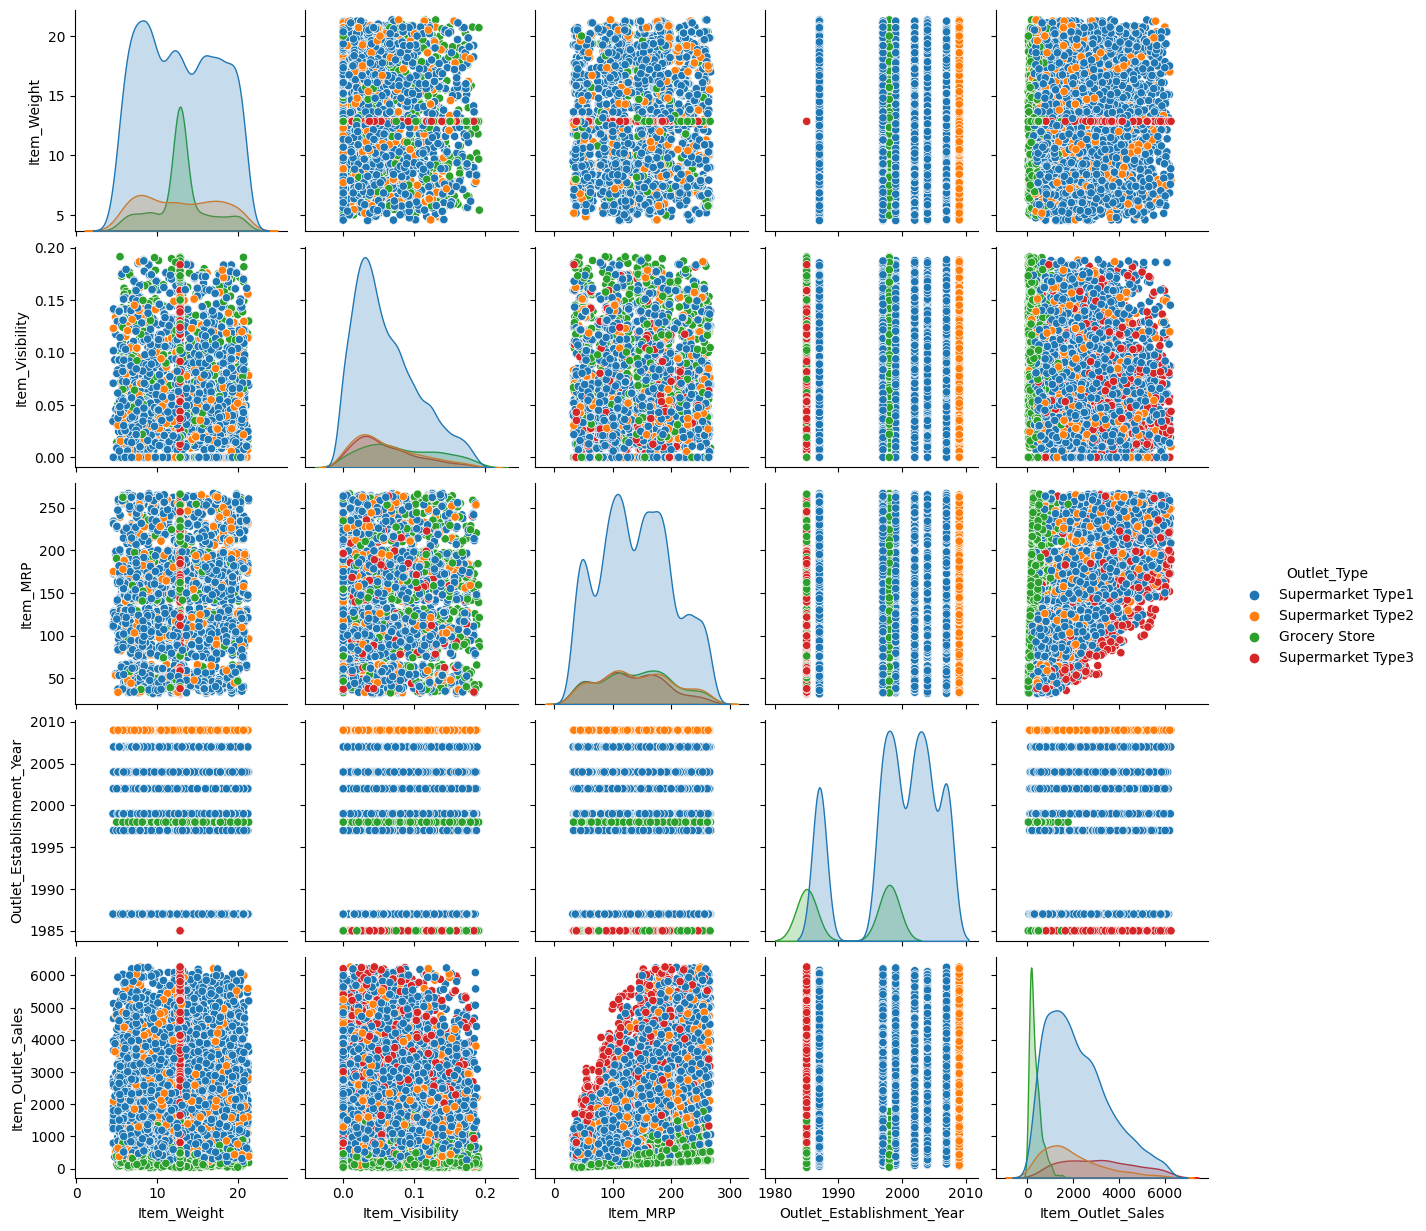

In [277]:
sns.pairplot(df,dropna = True, hue = 'Outlet_Type')

**Bi Variant Analyis of Item weight with  item Fat**

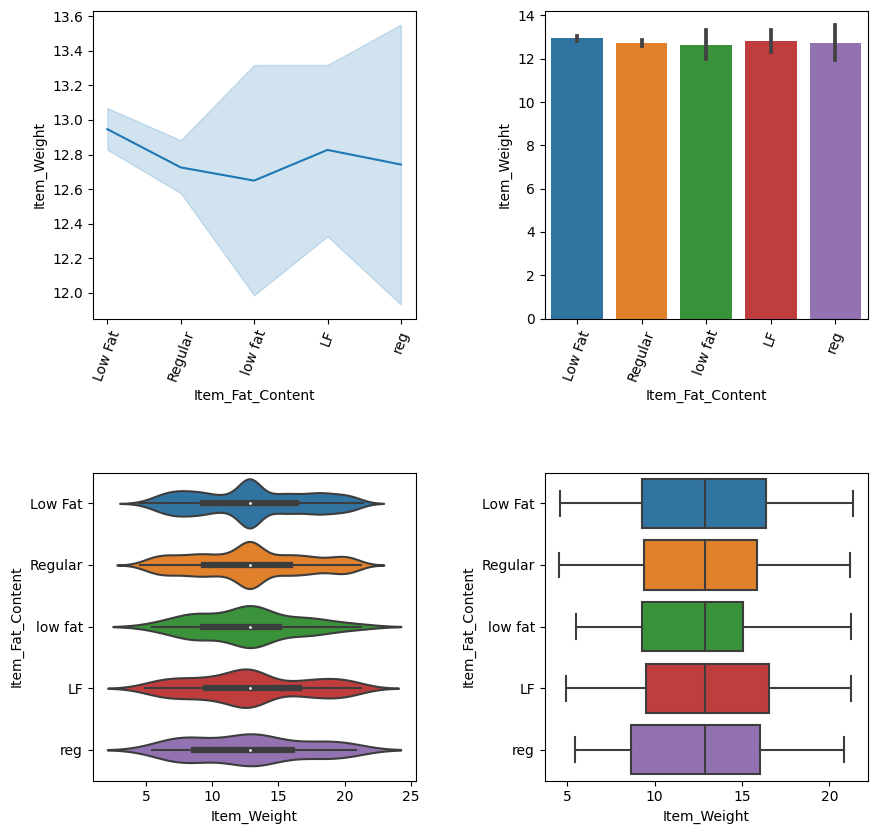

In [278]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.lineplot(y=df["Item_Weight"],x=df["Item_Fat_Content"],ax=axs[0,0])
axs[0,0].tick_params(axis='x',labelrotation=70)
sns.barplot(y=df["Item_Weight"],x=df["Item_Fat_Content"],ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=70)
sns.violinplot(x=df["Item_Weight"],y=df["Item_Fat_Content"],ax=axs[1,0])
sns.boxplot(x=df["Item_Weight"],y=df["Item_Fat_Content"],ax=axs[1,1])
plt.subplots_adjust(hspace=0.5,wspace=0.4)

**Bi Variant Analyis of Item weight with  item type**

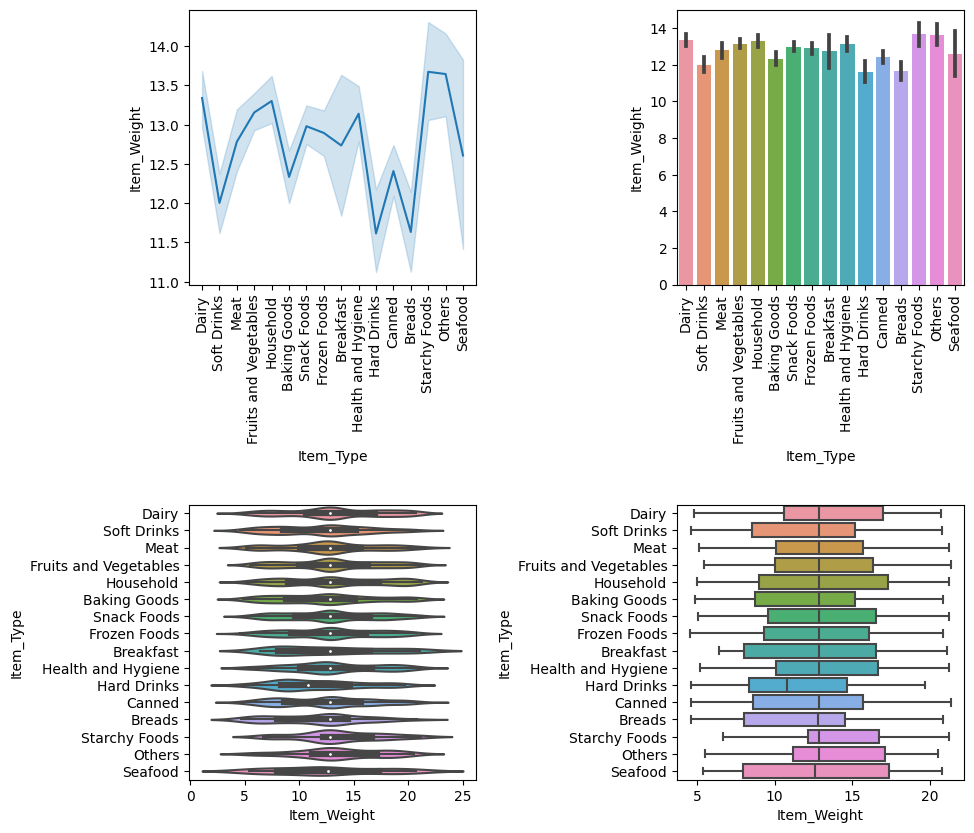

In [279]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.lineplot(y=df["Item_Weight"],x=df["Item_Type"],ax=axs[0,0])
axs[0,0].tick_params(axis='x',labelrotation=90)
sns.barplot(y=df["Item_Weight"],x=df["Item_Type"],ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=90)
sns.violinplot(x=df["Item_Weight"],y=df["Item_Type"],ax=axs[1,0])
sns.boxplot(x=df["Item_Weight"],y=df["Item_Type"],ax=axs[1,1])
plt.subplots_adjust(hspace=0.8,wspace=0.7)

**Bi Variant Analyis of Item weight with Item_Visibility**

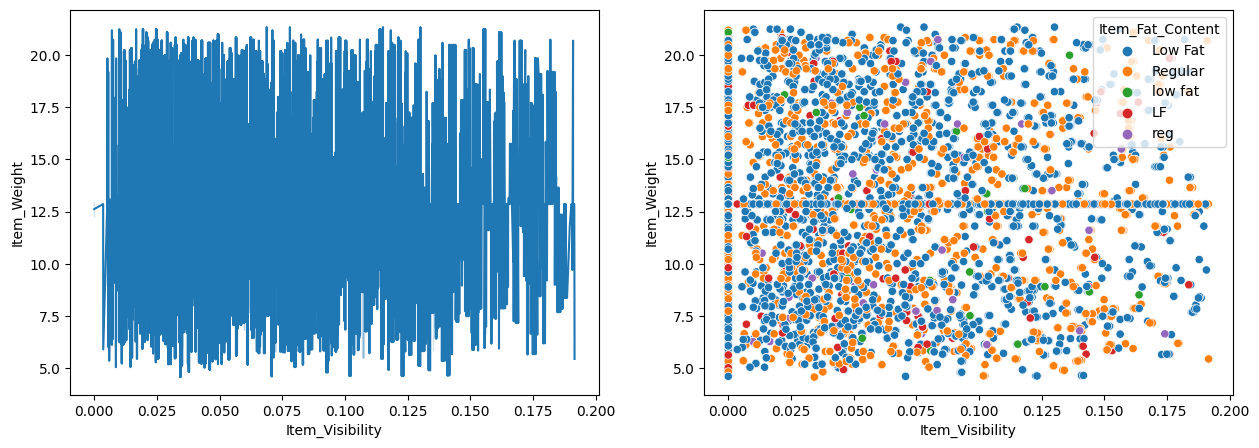

In [280]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.lineplot(y=df["Item_Weight"],x=df["Item_Visibility"],ax=axs[0])
sns.scatterplot(y=df["Item_Weight"],x=df["Item_Visibility"],hue=df["Item_Fat_Content"],ax=axs[1])
plt.subplots_adjust(hspace=0.2,wspace=0.2)

**BiVariant Analyis of Item weight with  Item_MRP**

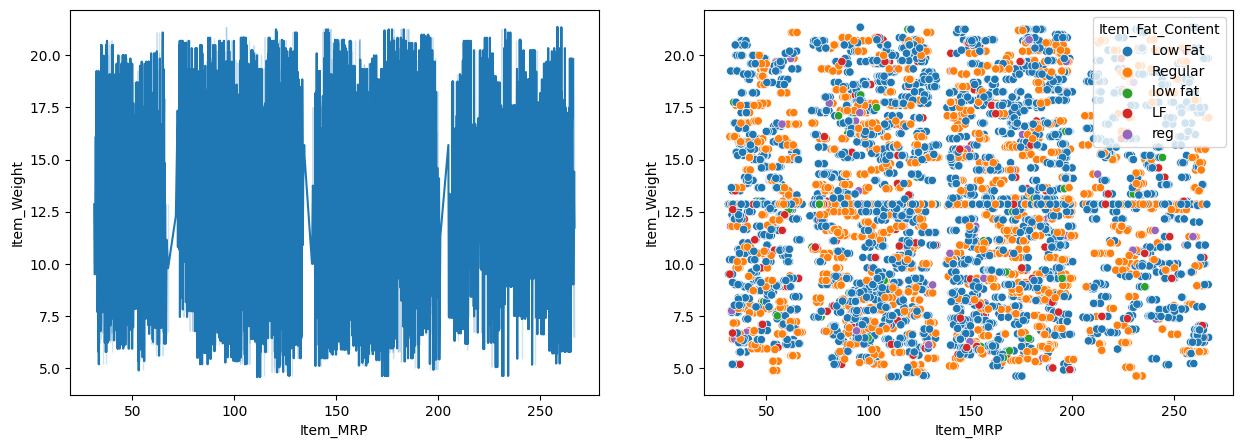

In [281]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.lineplot(y=df["Item_Weight"],x=df["Item_MRP"],ax=axs[0])
sns.scatterplot(y=df["Item_Weight"],x=df["Item_MRP"],hue=df["Item_Fat_Content"],ax=axs[1])
plt.subplots_adjust(hspace=0.2,wspace=0.2)

In [282]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7526
Item_Type                      16
Item_MRP                     5744
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3268
dtype: int64

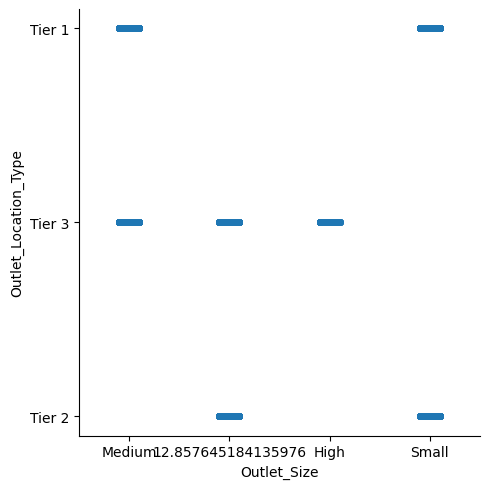

In [283]:
# fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.catplot(x="Outlet_Size",y="Outlet_Location_Type",data=df)

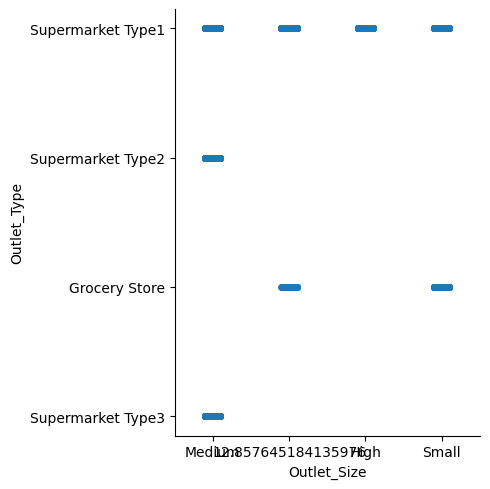

In [284]:
sns.catplot(x="Outlet_Size",y="Outlet_Type",data=df)

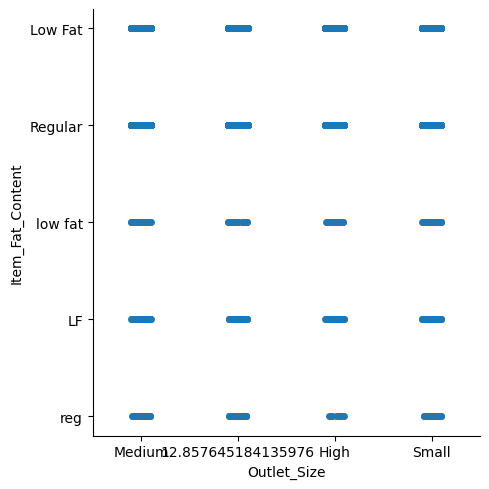

In [285]:
sns.catplot(x="Outlet_Size",y="Item_Fat_Content",data=df)


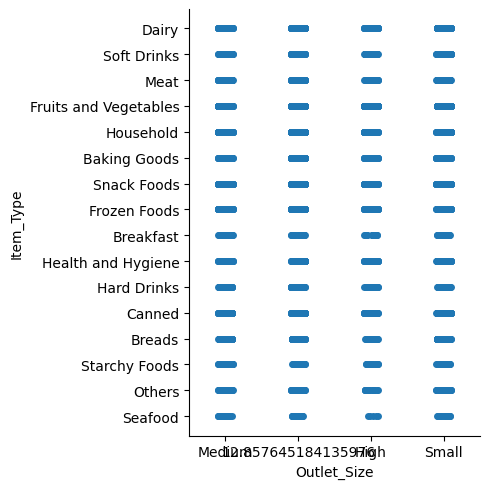

In [286]:
sns.catplot(x="Outlet_Size",y="Item_Type",data=df)


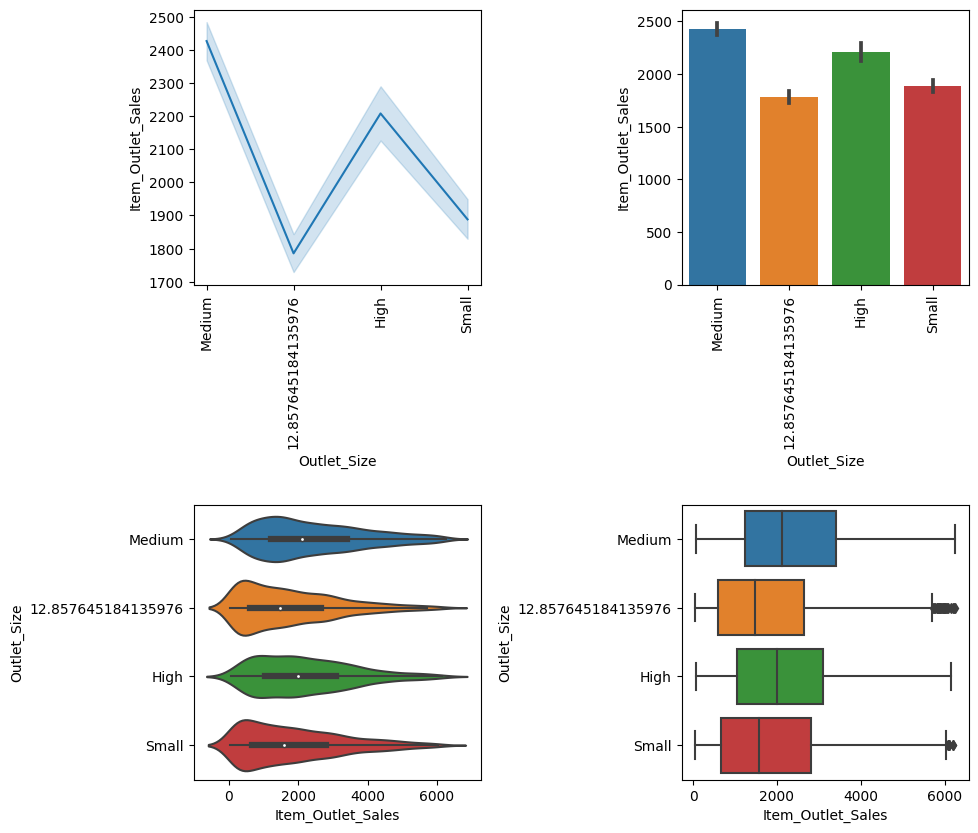

In [287]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.lineplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Size"].astype('str'),ax=axs[0,0])
axs[0,0].tick_params(axis='x',labelrotation=90)
sns.barplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Size"].astype('str'),ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=90)
sns.violinplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Size"].astype('str'),ax=axs[1,0])
sns.boxplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Size"].astype('str'),ax=axs[1,1])
plt.subplots_adjust(hspace=0.8,wspace=0.7)

In [288]:
# sns.swarmplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Size"])


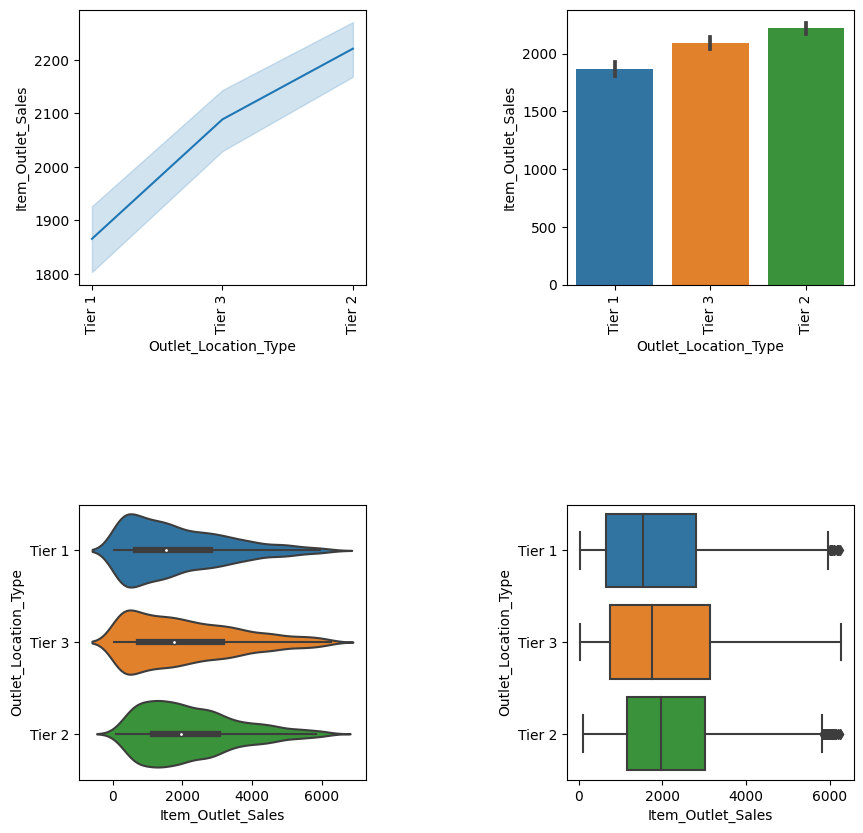

In [289]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.lineplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Location_Type"],ax=axs[0,0])
axs[0,0].tick_params(axis='x',labelrotation=90)
sns.barplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Location_Type"],ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=90)
sns.violinplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Location_Type"],ax=axs[1,0])
sns.boxplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Location_Type"],ax=axs[1,1])
plt.subplots_adjust(hspace=0.8,wspace=0.7)

In [290]:
# sns.swarmplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Location_Type"])


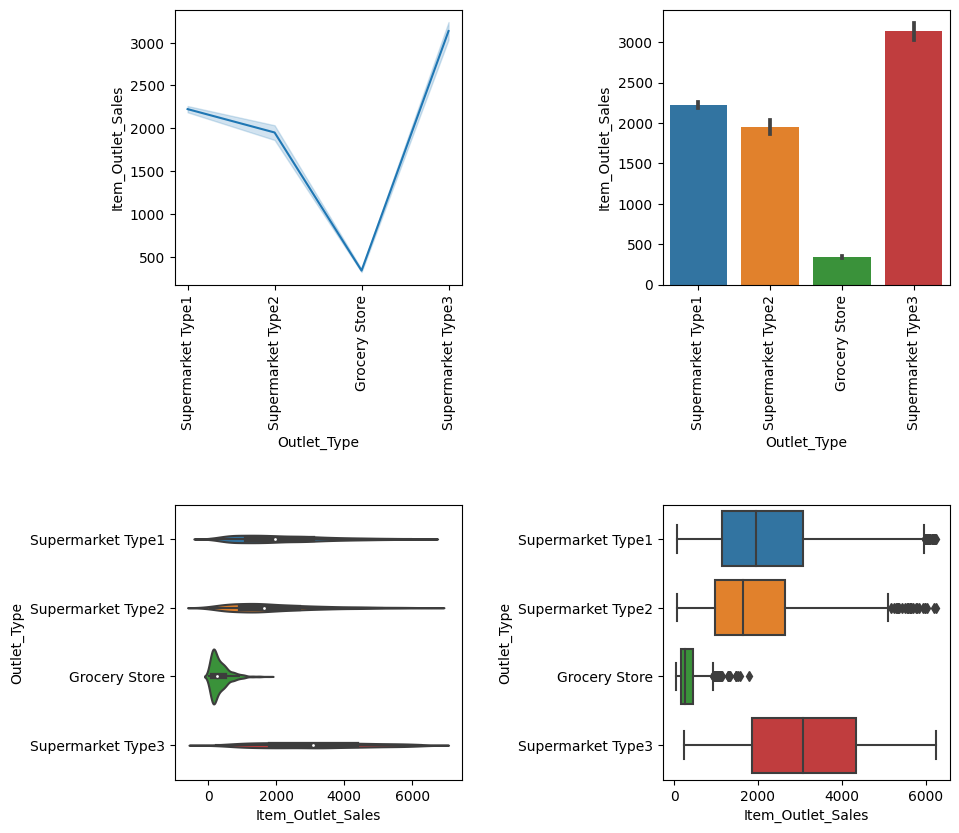

In [291]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.lineplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Type"],ax=axs[0,0])
axs[0,0].tick_params(axis='x',labelrotation=90)
sns.barplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Type"],ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=90)
sns.violinplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Type"],ax=axs[1,0])
sns.boxplot(x=df["Item_Outlet_Sales"],y=df["Outlet_Type"],ax=axs[1,1])
plt.subplots_adjust(hspace=0.8,wspace=0.7)

In [292]:
# sns.swarmplot(y=df["Item_Outlet_Sales"],x=df["Outlet_Type"])


In [293]:
df=df.dropna()

y=df["Item_Outlet_Sales"]
x=df.iloc[:,:-1]  
x=x.select_dtypes(["int","float"])
hot=df.select_dtypes(["object"])
print(hot.shape)
# hot

(8144, 7)


In [294]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot = encoder.fit_transform(hot.astype('str').values)

In [295]:
hot1=pd.DataFrame(one_hot.toarray())

In [296]:
result=pd.concat([x,hot1],axis=1)

In [297]:
hot1.values

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [298]:
# import numpy as np
c = np.concatenate((x.values, hot1.values), axis=1)

In [299]:
# x.dropna(inplace=True)

In [300]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(c,y)
# model=model.

In [301]:
model.score(c,y)

0.642771714822425

In [302]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(c, y)
y_pred = ridge_reg.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"R2 Score of model is {r2}")

R2 Score of model is 0.6426152457135501


In [303]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(c, y)
y_pred = lasso_reg.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2
print(f"R2 Score of analysis is {r2}")

R2 Score of analysis is 0.632848075945392


In [304]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma='scale', epsilon=0.1)
svr.fit(c, y)
y_pred = svr.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2
print(f"R2 Score of analysis is {r2}")

R2 Score of analysis is 0.3130751786113348


In [305]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(c, y)
y_pred = dtr.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2
print(f"R2 Score of analysis is {r2}")

R2 Score of analysis is 0.5146019949773628


In [306]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(c, y)
y_pred = rfr.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
r2
print(f"R2 Score of analysis is {r2}")

R2 Score of analysis is 0.6533965887846532


In [308]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgbr.fit(c, y)
y_pred = xgbr.predict(c)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"R2 Score of analysis is {r2}")

R2 Score of analysis is 0.6054331645428321


In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test = scaler.fit_transform(c)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
nnr = Sequential()
nnr.add(Dense(units=512, activation='relu', input_dim=x_test.shape[1]))
nnr.add(Dense(units=128))
nnr.add(Dense(units=64))
nnr.add(Dense(units=1))
nnr.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
nnr.fit(x_test, y, epochs=100, batch_size=32)
y_pred = nnr.predict(x_test)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"R2 Score of analysis is {r2}")

Epoch 1/100
255/255 [==============================] - 5s 13ms/step - loss: 2624914.7500 - mean_squared_error: 2624914.7500
Epoch 2/100
255/255 [==============================] - 3s 13ms/step - loss: 1173050.8750 - mean_squared_error: 1173050.8750
Epoch 3/100
255/255 [==============================] - 3s 13ms/step - loss: 939651.3125 - mean_squared_error: 939651.3125
Epoch 4/100
255/255 [==============================] - 3s 13ms/step - loss: 862445.1250 - mean_squared_error: 862445.1250
Epoch 5/100
255/255 [==============================] - 3s 13ms/step - loss: 813041.7500 - mean_squared_error: 813041.7500
Epoch 6/100
255/255 [==============================] - 3s 13ms/step - loss: 785880.1250 - mean_squared_error: 785880.1250
Epoch 7/100
255/255 [==============================] - 3s 13ms/step - loss: 751773.9375 - mean_squared_error: 751773.9375
Epoch 8/100
255/255 [==============================] - 3s 13ms/step - loss: 710007.0625 - mean_squared_error: 710007.0625
Epoch 9/100
168/255 